In [1]:
cd C:\Users\eyyup\OneDrive\Desktop\DTU_Fall_18\Machine Learning\Project 3

C:\Users\eyyup\OneDrive\Desktop\DTU_Fall_18\Machine Learning\Project 3


## Get the data as X, y, normalising

array([[ 1.16083891, -0.43143186, -0.36756545, -1.59437377, -0.73678528],
       [ 0.59664478, -0.34292854,  0.38172799, -1.59437377, -1.02593121],
       [-0.73389426, -1.10882071,  0.37977167, -1.59437377, -1.04183424],
       ..., 
       [ 1.2508048 , -0.89355933,  0.96017575,  1.59971148, -1.20231023],
       [ 0.37471177, -0.84390655,  1.245857  ,  1.59971148, -0.85822657],
       [-2.77124023, -0.84772881, -0.40988135,  1.59971148, -0.28427191]])

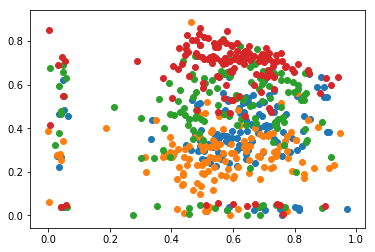

In [21]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import pandas as pd
import numpy as np
df = pd.read_excel('DataSet.xlsx')
%matplotlib inline
df = df[(df.temp<=1) & (df.temp>0) & (df.atemp<=1) & (df.atemp>=0) & (df.hum<=1) & (df.hum>=0) & (df.windspeed <=1)]
sub_df = df[['hum', 'temp', 'windspeed', 'mnth', 'new', 'weathersit', 'atemp', 'total']]

X = sub_df.as_matrix()
std = np.std(X, axis=0)
std = np.expand_dims(std,axis=0)

X = X/std
# Subtract mean value from data
X = X - np.ones((len(X),1))*X.mean(0)

mat_data = X
y = df[['season']].as_matrix().ravel()
attributeNames = [name for name in list(sub_df)]

plt.scatter(sub_df[y ==4].hum, sub_df[y ==4].temp)
plt.scatter(sub_df[y ==1].hum, sub_df[y ==1].temp)
plt.scatter(sub_df[y ==2].hum, sub_df[y ==2].temp)
plt.scatter(sub_df[y ==3].hum, sub_df[y ==3].temp)
X[:,:5]

# Applying PCA to segregate the data 

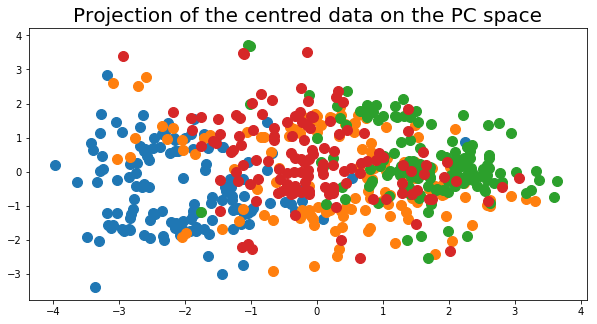

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
from scipy.linalg import svd
import numpy as np
from datetime import date

# X = df.as_matrix(columns=df.columns[(df.columns!='Date') & (df.columns!='season')])
N = len(sub_df.columns)

std = np.std(X, axis=0)
std = np.expand_dims(std,axis=0)

X = X/std
# Subtract mean value from data

Y = X - np.ones((N))*X.mean(axis=0)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)
V = V.T

Z = Y @ V[:,:5]


data = pd.DataFrame({'PCA-1':Z[:,0],'PCA-2':Z[:,1]})  

ax = plt.scatter(x="PCA-1", y="PCA-2",
                      s=100, 
                     data=data[y==1])
ax = plt.scatter(x="PCA-1", y="PCA-2",
                      s=100, 
                     data=data[y==2])
ax = plt.scatter(x="PCA-1", y="PCA-2",
                      s=100, 
                     data=data[y==3])
ax = plt.scatter(x="PCA-1", y="PCA-2",
                      s=100, 
                     data=data[y==4])
plt.title('Projection of the centred data on the PC space', fontsize = 20)

ax = ax.get_figure()
ax.savefig('projection_data.png')

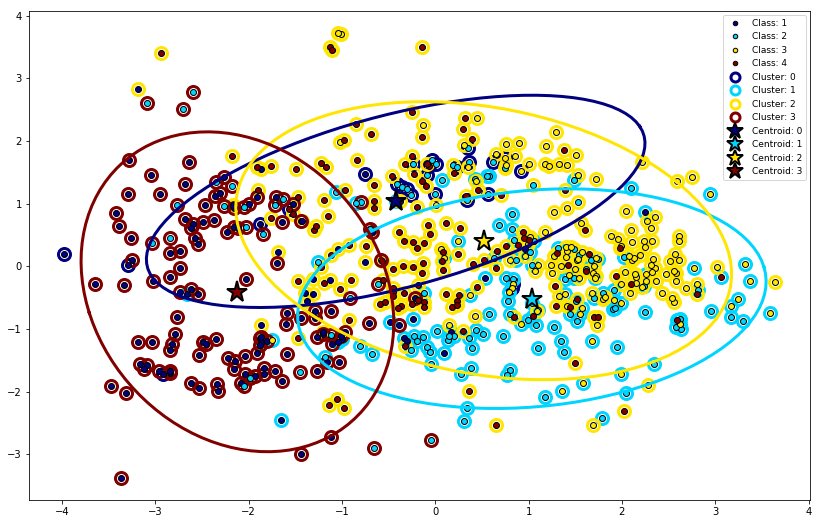

Ran Exercise 11.1.1


In [4]:
# exercise 11.1.1
from matplotlib.pyplot import figure, show, savefig
import numpy as np
from scipy.io import loadmat
from Toolbox_Python.Scripts.Tools.toolbox_02450 import clusterplot
from sklearn.mixture import GaussianMixture

attributeNames = [name for name in sub_df.columns]
X = Z
#X_old = X
#X = np.hstack([X,X])
N, M = X.shape
C = 4
# Number of clusters
K = 4
cov_type = 'full'       
# type of covariance, you can try out 'diag' as well
reps = 1                
# number of fits with different initalizations, best result will be kept
# Fit Gaussian mixture model
gmm = GaussianMixture(n_components=K, covariance_type=cov_type, n_init=reps, 
                      tol=1e-6).fit(X)
cls = gmm.predict(X)    
# extract cluster labels
cds = gmm.means_        
# extract cluster centroids (means of gaussians)
covs = gmm.covariances_
# extract cluster shapes (covariances of gaussians)
if cov_type.lower() == 'diag':
    new_covs = np.zeros([K,M,M])    
    
    count = 0    
    for elem in covs:
        temp_m = np.zeros([M,M])
        new_covs[count] = np.diag(elem)
        count += 1

    covs = new_covs

# Plot results:
# figure(figsize=(14,9))
# clusterplot(X, clusterid=cls, centroids=cds, y=y, covars=covs)
# show()

## In case the number of features != 2, then a subset of features most be plotted instead.
figure(figsize=(14,9))
idx = [0,1] # feature index, choose two features to use as x and y axis in the plot
clusterplot(X[:,idx], clusterid=cls, centroids=cds[:,idx], y=y, covars=covs[:,idx,:][:,:,idx])

savefig('Clustering1_GMM.png')
show()


print('Ran Exercise 11.1.1')

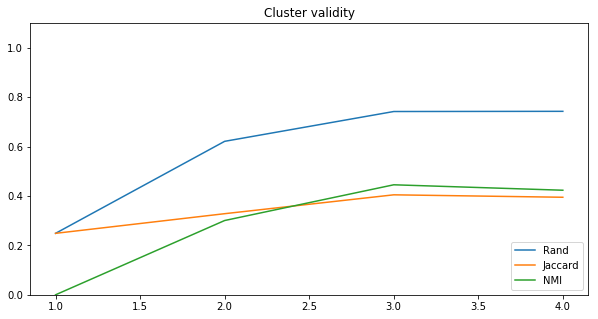

Ran Exercise 10.1.3


In [5]:
from matplotlib.pyplot import figure, title, plot, ylim, legend, show
import numpy as np
from scipy.io import loadmat
from Toolbox_Python.Scripts.Tools.toolbox_02450 import clusterval
from sklearn.cluster import k_means
# Maximum number of clusters:
K = 4

# Allocate variables:
Rand = np.zeros((K,))
Jaccard = np.zeros((K,))
NMI = np.zeros((K,))

for k in range(K):
    # run K-means clustering:
    #cls = Pycluster.kcluster(X,k+1)[0]
    centroids, cls, inertia = k_means(X,k+1)
    # compute cluster validities:
    Rand[k], Jaccard[k], NMI[k] = clusterval(y,cls)    
        
# Plot results:

figure(1)
title('Cluster validity')
plot(np.arange(K)+1, Rand)
plot(np.arange(K)+1, Jaccard)
plot(np.arange(K)+1, NMI)
ylim(0,1.1)
legend(['Rand', 'Jaccard', 'NMI'], loc=4)
show()

print('Ran Exercise 10.1.3')

In [6]:
Rand

array([ 0.24874743,  0.62112041,  0.74176687,  0.74252519])

# Crossvalidation for AIC-BIC-Crossvalidation

Fitting model for K=1
Fitting model for K=2
Fitting model for K=3
Fitting model for K=4
Fitting model for K=5
Fitting model for K=6
Fitting model for K=7
Fitting model for K=8
Fitting model for K=9
Fitting model for K=10
Fitting model for K=11
Fitting model for K=12
Fitting model for K=13
Fitting model for K=14
Fitting model for K=15
Fitting model for K=16
Fitting model for K=17
Fitting model for K=18
Fitting model for K=19
Fitting model for K=20


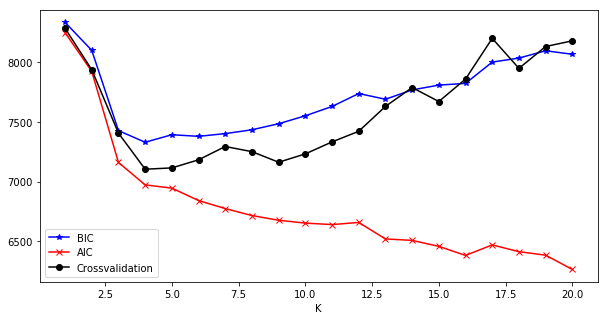

Ran Exercise 11.1.5


In [7]:
# exercise 11.1.5
from matplotlib.pyplot import figure, plot, legend, xlabel, show, savefig
import numpy as np
from scipy.io import loadmat
from sklearn.mixture import GaussianMixture
from sklearn import model_selection

N, M = X.shape
C = 4


# Range of K's to try
KRange = range(1,11)
T = len(KRange)

covar_type = 'full'     # you can try out 'diag' as well
reps = 3                # number of fits with different initalizations, best result will be kept

# Allocate variables
BIC = np.zeros((T,))
AIC = np.zeros((T,))
CVE = np.zeros((T,))

# K-fold crossvalidation
CV = model_selection.KFold(n_splits=10,shuffle=True)

for t,K in enumerate(KRange):
        print('Fitting model for K={0}'.format(K))

        # Fit Gaussian mixture model
        gmm = GaussianMixture(n_components=K, covariance_type=covar_type, n_init=reps).fit(X)

        # Get BIC and AIC
        BIC[t,] = gmm.bic(X)
        AIC[t,] = gmm.aic(X)

        # For each crossvalidation fold
        for train_index, test_index in CV.split(X):

            # extract training and test set for current CV fold
            X_train = X[train_index]
            X_test = X[test_index]

            # Fit Gaussian mixture model to X_train
            gmm = GaussianMixture(n_components=K, covariance_type=covar_type, n_init=reps).fit(X_train)

            # compute negative log likelihood of X_test
            CVE[t] += -gmm.score_samples(X_test).sum()
            

# Plot results

figure(1); 
plot(KRange, BIC,'-*b')
plot(KRange, AIC,'-xr')
plot(KRange, 2*CVE,'-ok')
legend(['BIC', 'AIC', 'Crossvalidation'])
xlabel('K')
savefig('AIC_BIC_CV.png')
show()


print('Ran Exercise 11.1.5')

# Hiearachical Clustering

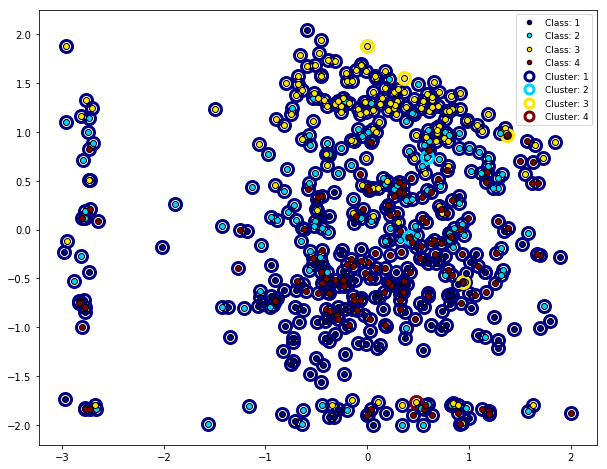

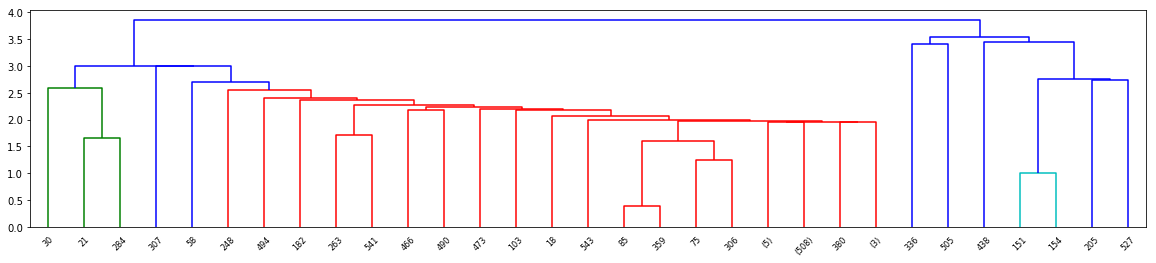

Ran Exercise 10.2.1


In [31]:
# exercise 10.2.1
from matplotlib.pyplot import figure, show, savefig
from scipy.io import loadmat
from Toolbox_Python.Scripts.Tools.toolbox_02450 import clusterplot
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram


N, M = X.shape
C = 4


# Perform hierarchical/agglomerative clustering on data matrix
Method = 'single'
Metric = 'euclidean'

Z = linkage(X, method=Method, metric=Metric)

# Compute and display clusters by thresholding the dendrogram
Maxclust = 4
cls = fcluster(Z, criterion='maxclust', t=Maxclust)
figure(1,figsize=(10,8))
clusterplot(X, cls.reshape(cls.shape[0],1), y=y)

# Display dendrogram
max_display_levels=15
figure(2,figsize=(20,4))
dendrogram(Z, truncate_mode='level', p=max_display_levels)

savefig('Hierarchical_Clustering.png')
show()

print('Ran Exercise 10.2.1')

# Comparision of Hierarchical and GMM

C:\Users\eyyup\OneDrive\Desktop\DTU_Fall_18\Machine Learning\Project 3\Toolbox_Python\Scripts\Tools\toolbox_02450.py:536: RuntimeWarning: invalid value encountered in true_divide
  p_ij[k,c] = m_ij.astype(float)/m_i[k]


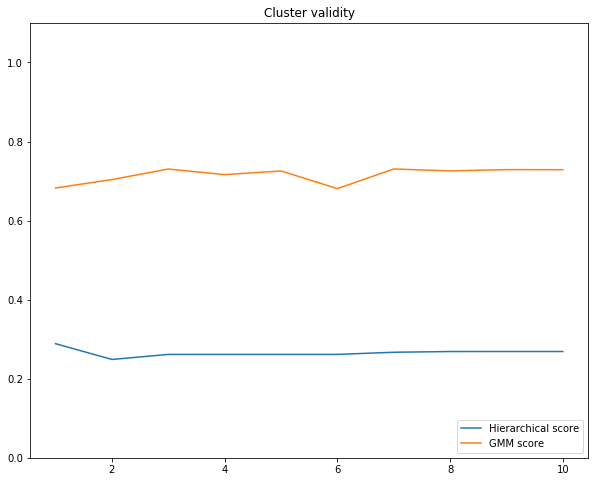

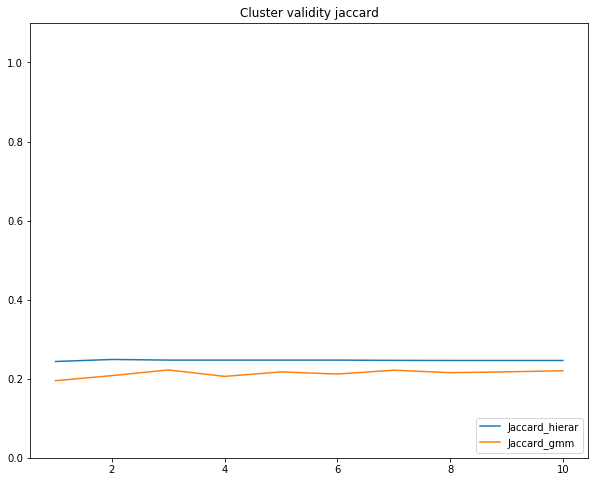

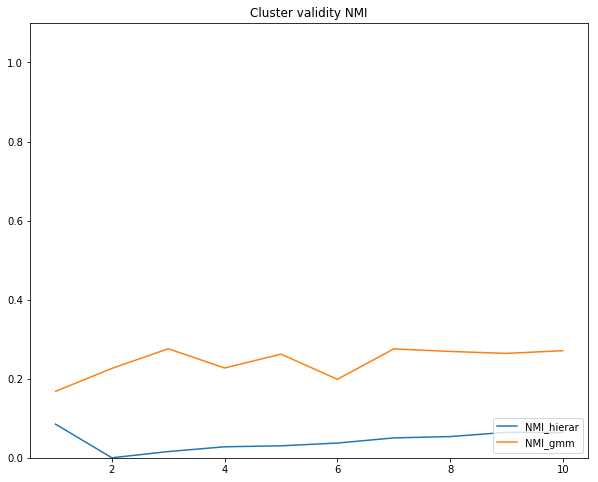

Ran Exercise 10.1.3


In [38]:
from matplotlib.pyplot import figure, title, plot, ylim, legend, show
import numpy as np
from scipy.io import loadmat
from Toolbox_Python.Scripts.Tools.toolbox_02450 import clusterval
from sklearn.cluster import k_means
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.mixture import GaussianMixture
# Maximum number of clusters:
K = 10

# Allocate variables:
Rand_gmm = np.zeros((K,))
Jaccard_gmm = np.zeros((K,))
NMI_gm = np.zeros((K,))

Rand_hierar = np.zeros((K,))
Jaccard_hierar = np.zeros((K,))
NMI_hierar = np.zeros((K,))

for k in range(K):
    # Perform hierarchical/agglomerative clustering on data matrix
    Method = 'single'
    Metric = 'euclidean'

    Z = linkage(X, method=Method, metric=Metric)

    # Compute and display clusters by thresholding the dendrogram
    Maxclust = k
    cls = fcluster(Z, criterion='maxclust', t=Maxclust)
    Rand_hierar[k], Jaccard_hierar[k], NMI_hierar[k] = clusterval(y,cls)
    
    
    # Fit Gaussian mixture model
    gmm = GaussianMixture(n_components=K, covariance_type=cov_type, n_init=reps, 
                          tol=1e-6).fit(X)
    cls = gmm.predict(X)   
    # compute cluster validities:
    Rand_gmm[k], Jaccard_gmm[k], NMI_gm[k] = clusterval(y,cls)    
        
# Plot results:

figure(1,figsize=(10,8))
title('Cluster validity')
plot(np.arange(K)+1, Rand_hierar)
plot(np.arange(K)+1, Rand_gmm)
ylim(0,1.1)
legend(['Hierarchical score', 'GMM score'], loc=4)
savefig('Comparision_GMM_Hiear.png')
show()

figure(2,figsize=(10,8))
title('Cluster validity jaccard')
plot(np.arange(K)+1, Jaccard_hierar)
plot(np.arange(K)+1, Jaccard_gmm)
ylim(0,1.1)
legend(['Jaccard_hierar', 'Jaccard_gmm'], loc=4)
show()

figure(3,figsize=(10,8))
title('Cluster validity NMI')
plot(np.arange(K)+1, NMI_hierar)
plot(np.arange(K)+1, NMI_gm)
ylim(0,1.1)
legend(['NMI_hierar', 'NMI_gmm'], loc=4)
show()


print('Ran Exercise 10.1.3')